In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv("./data/pima_diabetes_data.csv")

In [3]:
# Display first few rows
print("First 5 Rows of the DataFrame:")
print(df.head())

# Display last few rows
print("\nLast 5 Rows of the DataFrame:")
print(df.tail())

# Display shape of dataset
print(f"\nDataset Shape: {df.shape}")

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Check for duplicated values
print("\nDuplicated Values:", df.duplicated().sum())

First 5 Rows of the DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Last 5 Rows of the DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5   

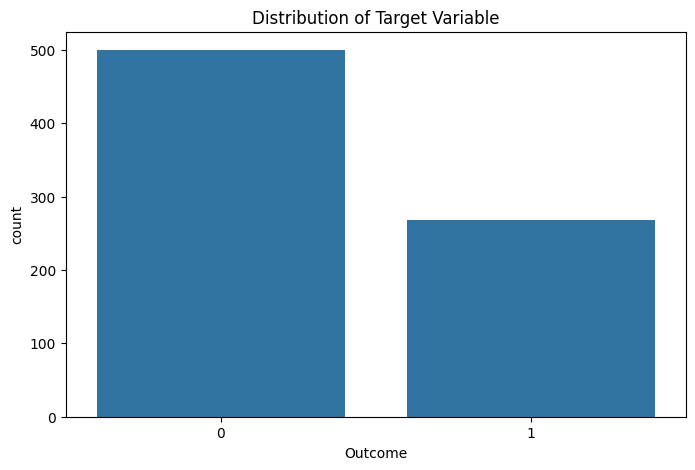

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Outcome")  # use correct column name
plt.title("Distribution of Target Variable")
plt.show()


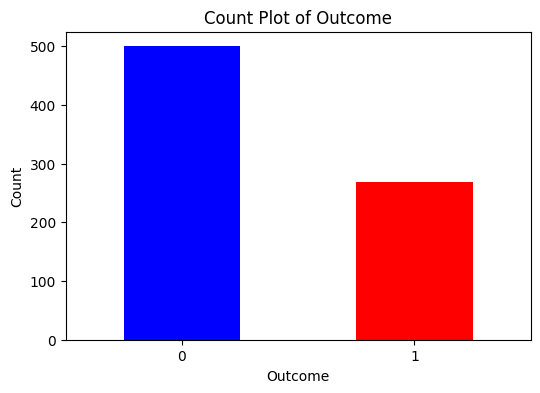

In [5]:
# Plot bar chart for Outcome distribution
plt.figure(figsize=(6, 4))
df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count Plot of Outcome')
plt.xticks(rotation=0)
plt.show()


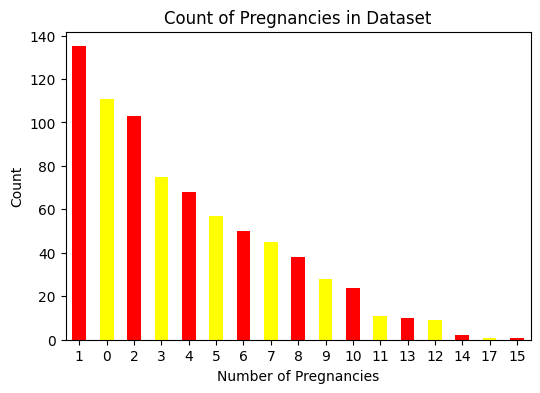

In [6]:
# Plot bar chart for Application mode distribution
plt.figure(figsize=(6,4))
df['Pregnancies'].value_counts().plot(kind='bar', color=['red', 'yellow'])  # Customize colors
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.title('Count of Pregnancies in Dataset')
plt.xticks(rotation=0)   
plt.show()



In [7]:
# Detect outliers using IQR method
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

print("\nNumber of Outliers in Numerical Features:")
print(outliers)


Number of Outliers in Numerical Features:
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [8]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check column names
print("\nColumn Names:")
print(df.columns)

# Summary of dataset
print("\nDataset Summary:")
print(df.info())


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

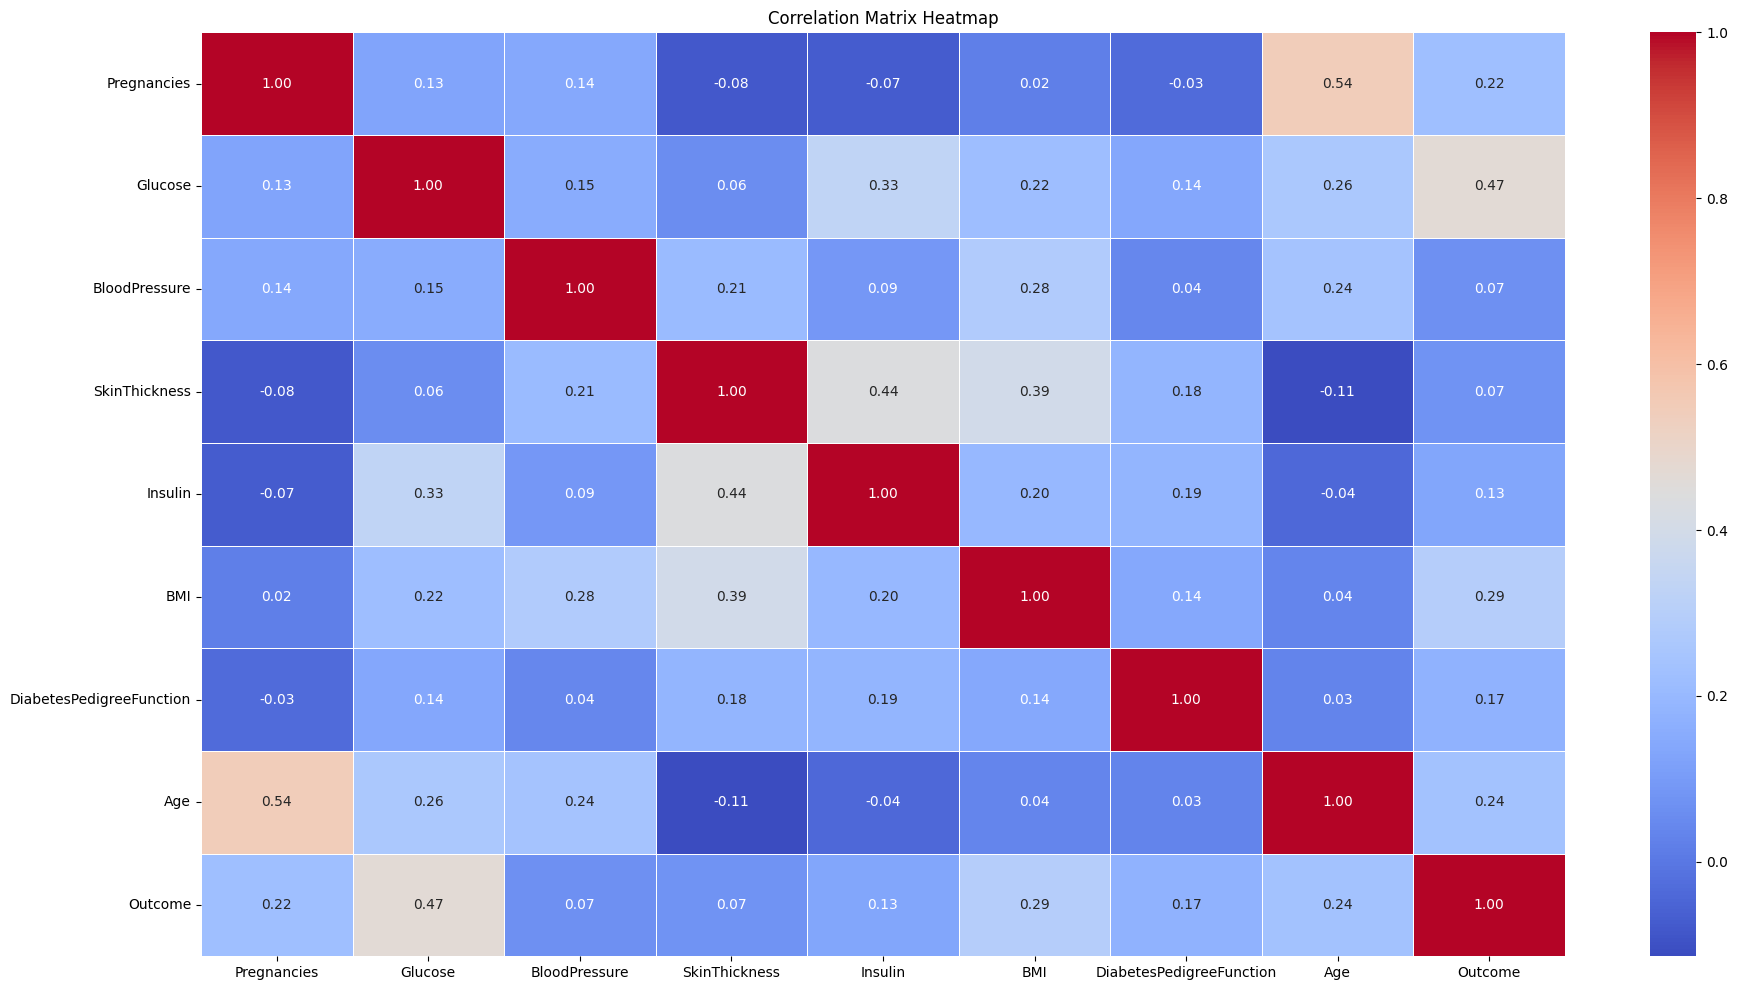

In [9]:
# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate and plot the correlation matrix
plt.figure(figsize=(22, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

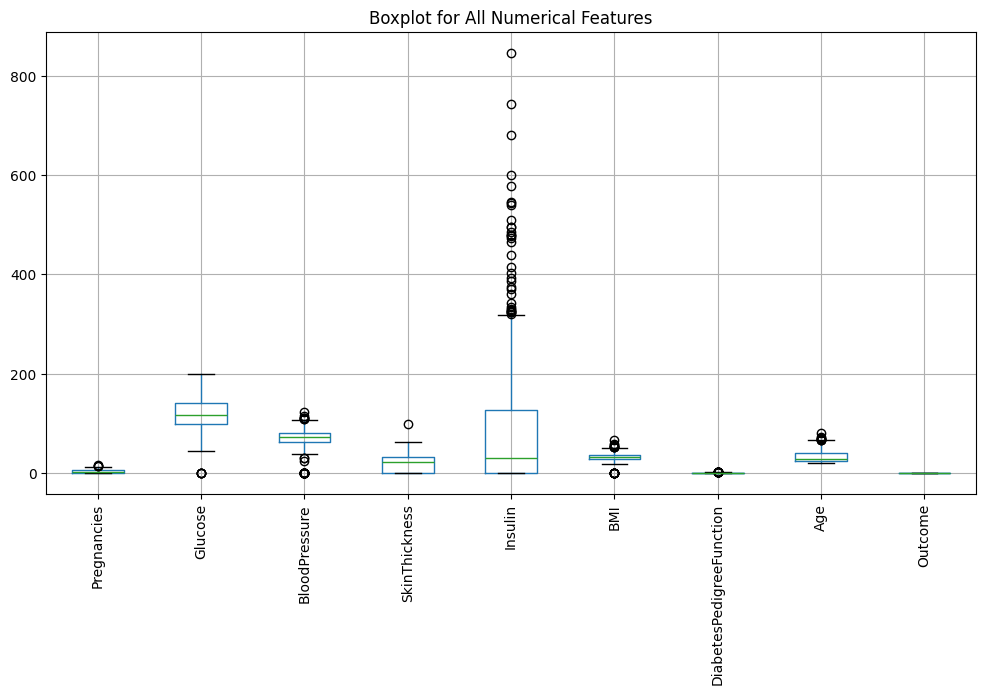

In [10]:

# Boxplot for all numerical features
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for All Numerical Features")
plt.show()

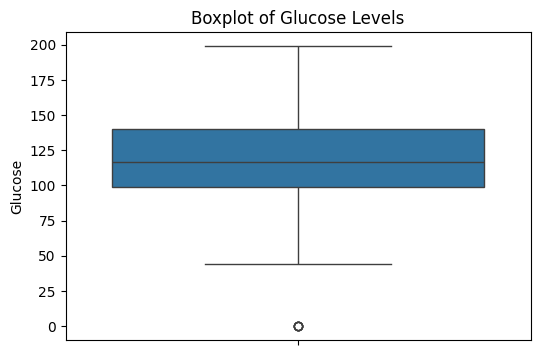

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Glucose"])
plt.title("Boxplot of Glucose Levels")
plt.show()


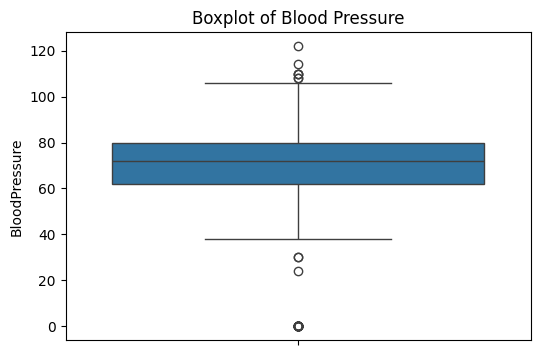

In [12]:
# Boxplot grouped by categorical variable
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["BloodPressure"])
plt.title("Boxplot of Blood Pressure")
plt.show()

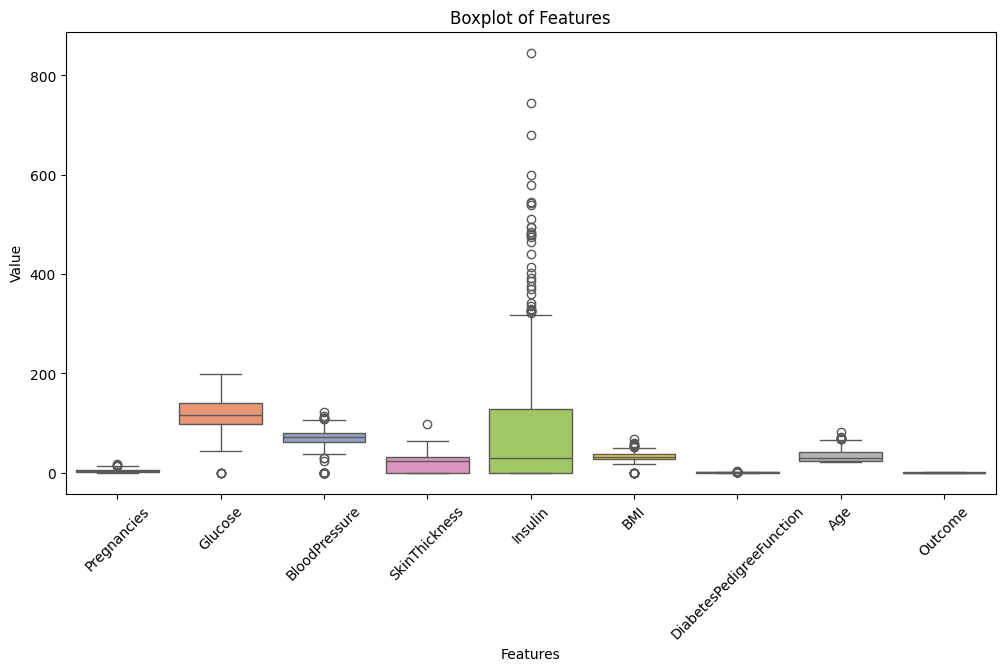

In [13]:
# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
# Customizing the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, palette="Set2")
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


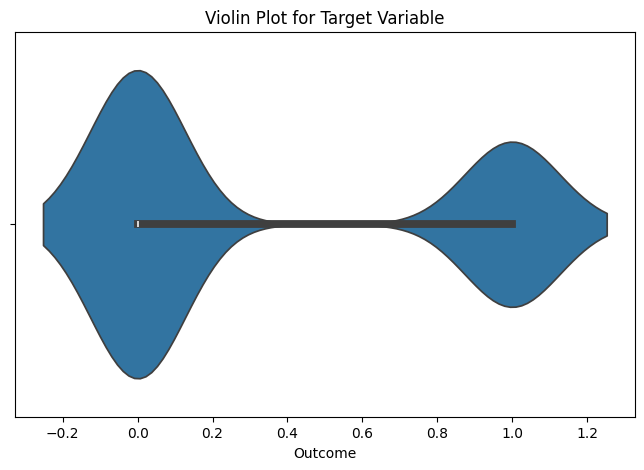

In [14]:
# Violin plot for target variable
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Outcome")
plt.title("Violin Plot for Target Variable")
plt.show()

In [15]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [16]:
# Separate features and target variable
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Normalize numerical features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [19]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


models = {
    "XGBClassifier":XGBClassifier(),
    "LGBMClassifier":LGBMClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

best_model = None
best_score = 0
model_results = {}
best_model_instance = None

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy

    if accuracy > best_score:
        best_score = accuracy
        best_model = name
        best_model_instance = model

# Print results
for model, score in model_results.items():
    print(f"{model}: {score:.4f}")

print(f"\nBest Model: {best_model} with accuracy: {best_score:.4f}")

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [20]:
model_data = {
    'model': best_model_instance,
    'scaler': scaler
}

joblib.dump(model_data, './model/diabetic_best_model.pkl')
print("Best model saved as 'diabetic_best_model.pkl'")

Best model saved as 'diabetic_best_model.pkl'


In [21]:
import joblib

model_data = joblib.load("./model/diabetic_best_model.pkl")

best_model = model_data['model']
scaler = model_data['scaler']

new_sample = np.array([[5, 150, 85, 35, 140, 33.6, 0.627, 50]])
new_sample_scaled = scaler.transform(new_sample)

# Predict using the best model
prediction = best_model.predict(new_sample_scaled)
print("Prediction for input sample:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")


Prediction for input sample: Diabetic


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
